In [3]:
import math
from qiskit import *
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import QuantumCircuit, QuantumRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT, CU1Gate

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

In [11]:
#Ahora vamos con la función que genera el circuito

def TCF_recursivo(circuit, n):
    if n == 0:
        for i in range(int(circuit.num_qubits/2)):
            circuit.swap(i, n-i-1)
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(math.pi/2**(n-qubit), qubit, n)
    TCF_recursivo(circuit, n)

def TCF(n):
    qc = QuantumCircuit(n)
    TCF_recursivo(qc,n)
    return qc

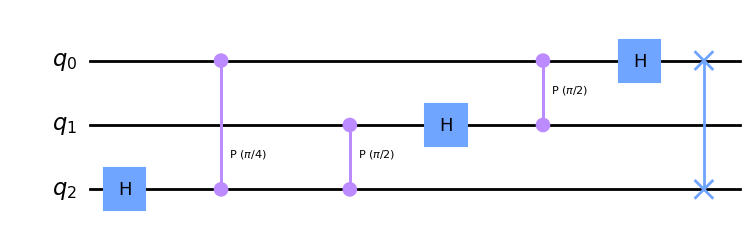

In [9]:
TCF(3).draw('mpl')

Por otra parte, Qiskit tiene una implementación propia de este circuito, que es la que utilizaremos a partir de ahora. 

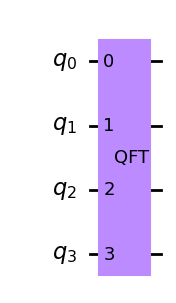

In [5]:
qc = QFT(num_qubits=4, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name=None)
qc.draw('mpl')